In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
data=pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

### Decision tree

In [21]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

[Text(283.2923076923077, 380.52, 'X[1] <= 111.5\nentropy = 0.952\nsamples = 576\nvalue = [362, 214]'),
 Text(103.01538461538462, 271.8, 'X[5] <= 26.35\nentropy = 0.612\nsamples = 252\nvalue = [214, 38]'),
 Text(51.50769230769231, 163.07999999999998, 'entropy = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'X[7] <= 25.5\nentropy = 0.741\nsamples = 181\nvalue = [143, 38]'),
 Text(103.01538461538462, 54.360000000000014, 'entropy = 0.297\nsamples = 76\nvalue = [72, 4]'),
 Text(206.03076923076924, 54.360000000000014, 'entropy = 0.908\nsamples = 105\nvalue = [71, 34]'),
 Text(463.5692307692308, 271.8, 'X[1] <= 154.5\nentropy = 0.995\nsamples = 324\nvalue = [148, 176]'),
 Text(360.55384615384617, 163.07999999999998, 'X[5] <= 26.35\nentropy = 0.988\nsamples = 232\nvalue = [131, 101]'),
 Text(309.04615384615386, 54.360000000000014, 'entropy = 0.323\nsamples = 34\nvalue = [32, 2]'),
 Text(412.0615384615385, 54.360000000000014, 'entropy = 1.0\nsamples = 198\n

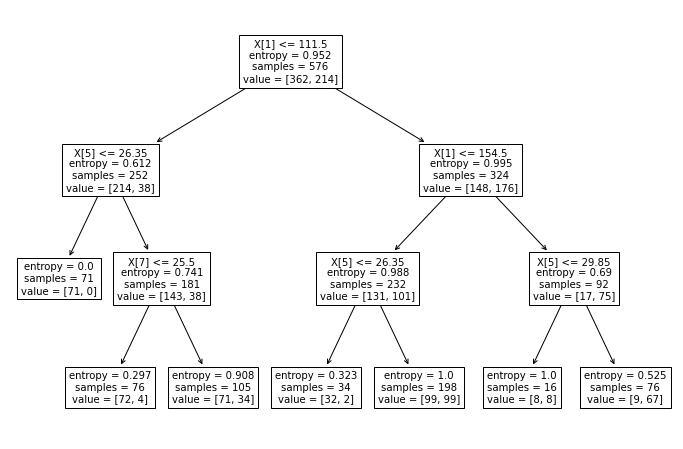

In [22]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train, y_train)) 

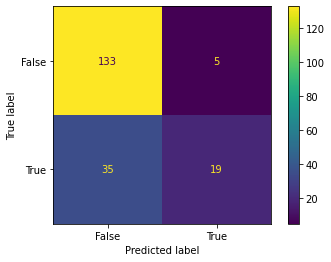

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [24]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.7917


### Random Forest

In [25]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [26]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.7864583333333334


In [27]:
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.231824
 2) BMI                            0.177369
 3) Age                            0.139010
 4) DiabetesPedigreeFunction       0.128602
 5) BloodPressure                  0.094303
 6) Pregnancies                    0.085938
 7) SkinThickness                  0.071825
 8) Insulin                        0.071130


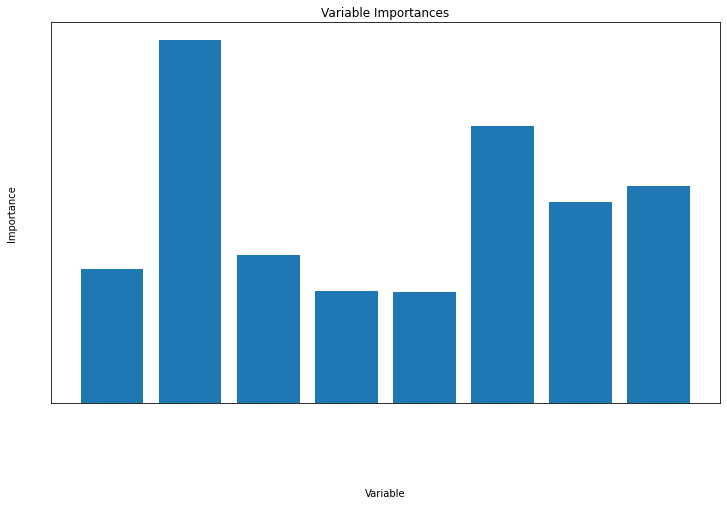

In [28]:
plt.figure(figsize=(12,7))
plt.tick_params(colors='white')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, list(data.columns)[0:8],rotation=30)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()